<a href="https://colab.research.google.com/github/tejashreecrk/FUTURE_DS_01/blob/main/Business_sales_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracted files: ['.config', 'superstore.xls.zip', 'superstore.xls', 'sample_data']

--- DATA LOADED SUCCESSFULLY ---

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Laude

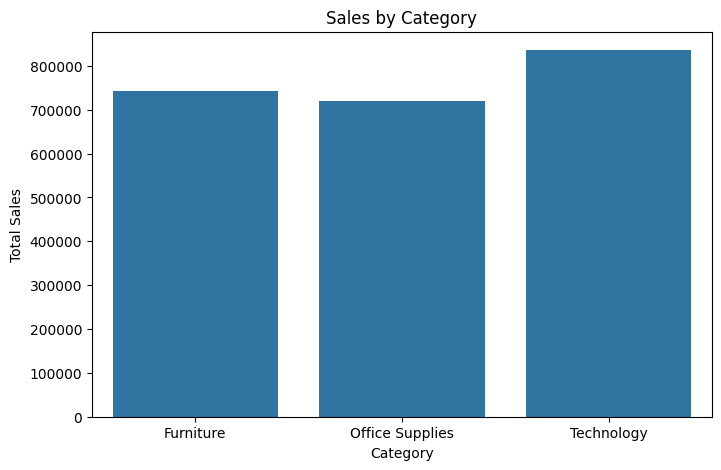

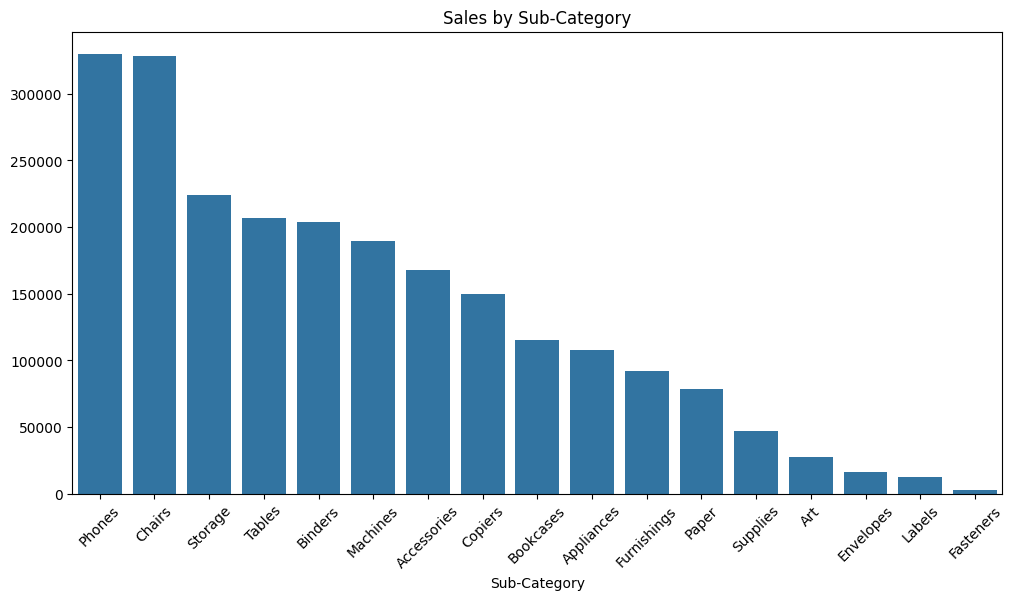

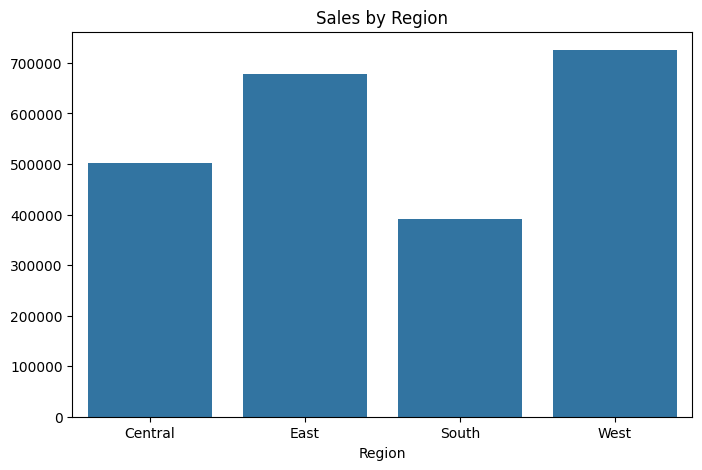

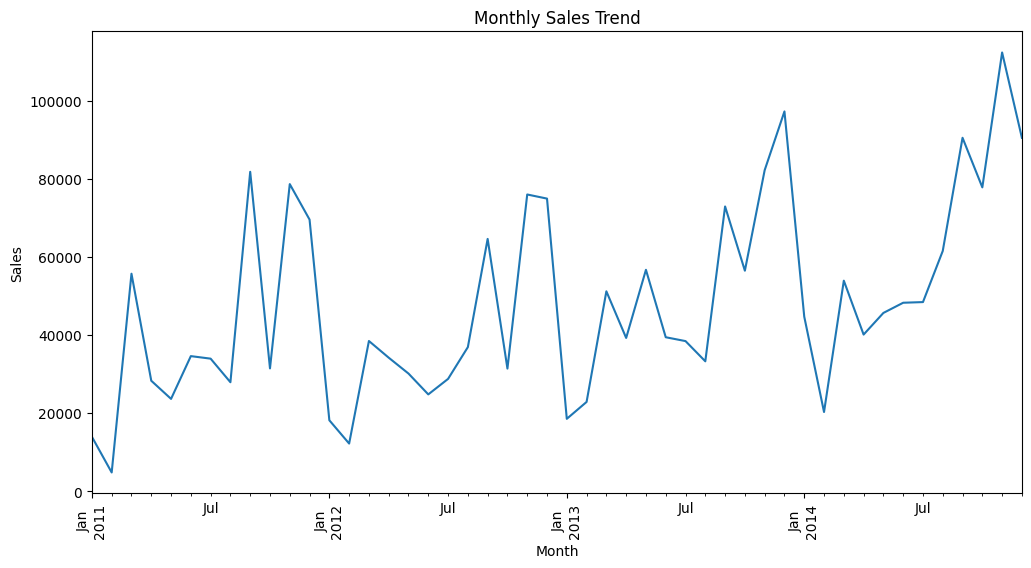


----------------------------
        KEY INSIGHTS        
----------------------------

1. Highest Sales Category: Technology -> 836154.03
2. Lowest Sales Category: Office Supplies -> 719047.03
3. Best Performing Sub-Category: Phones -> 330007.05
4. Best Region: West -> 725457.82
5. Top Selling Product: Canon imageCLASS 2200 Advanced Copier -> 61599.82

--- Analysis Complete ---


In [4]:
# ------------------------------------------------------
# SUPERSTORE SALES ANALYSIS - SINGLE CELL FULL CODE
# ------------------------------------------------------

# STEP 1: Install library for .xls files
!pip install xlrd

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# STEP 3: Unzip the dataset (superstore.xls.zip must be uploaded to Colab)
zip_file = "superstore.xls.zip"

with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall()

# Check extracted files
print("Extracted files:", os.listdir())

# STEP 4: Load the Excel dataset
df = pd.read_excel("superstore.xls", engine="xlrd")

print("\n--- DATA LOADED SUCCESSFULLY ---\n")
print(df.head())

# STEP 5: Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.dropna(inplace=True)

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')

# STEP 6: Basic Overview
print("\n--- DATA INFO ---\n")
print(df.info())

print("\n--- SUMMARY STATISTICS ---\n")
print(df.describe())

# STEP 7: ANALYSIS

# 1. Category Sales
category_sales = df.groupby('Category')['Sales'].sum()
print("\n--- CATEGORY SALES ---\n")
print(category_sales)

# 2. Sub-category Sales
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print("\n--- SUB-CATEGORY SALES ---\n")
print(subcategory_sales.head(10))

# 3. Region Sales
region_sales = df.groupby('Region')['Sales'].sum()
print("\n--- REGION SALES ---\n")
print(region_sales)

# 4. Top 10 Products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\n--- TOP 10 PRODUCTS BY SALES ---\n")
print(top_products)

# 5. Monthly Sales Trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
print("\n--- MONTHLY SALES TREND ---\n")
print(monthly_sales)

# STEP 8: VISUALIZATIONS

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.xticks(rotation=45)
plt.title("Sales by Sub-Category")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()

monthly_sales.plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.show()

# STEP 9: INSIGHTS SUMMARY
print("\n----------------------------")
print("        KEY INSIGHTS        ")
print("----------------------------")

print(f"\n1. Highest Sales Category: {category_sales.idxmax()} -> {category_sales.max():.2f}")
print(f"2. Lowest Sales Category: {category_sales.idxmin()} -> {category_sales.min():.2f}")
print(f"3. Best Performing Sub-Category: {subcategory_sales.idxmax()} -> {subcategory_sales.max():.2f}")
print(f"4. Best Region: {region_sales.idxmax()} -> {region_sales.max():.2f}")
print(f"5. Top Selling Product: {top_products.idxmax()} -> {top_products.max():.2f}")

print("\n--- Analysis Complete ---")


In [3]:
import os
os.listdir()


['.config', 'superstore.xls.zip', 'sample_data']